[링크 텍스트](https://)# Example code of TrOCR
Colab 환경에서 TrOCR 모델을 사용해 손글씨를 인식해보는 예제입니다.

## 패키지 및 예제 데이터 다운로드하기


In [1]:
!wget https://raw.github.com/jskimn/aiservice_lesson/main/001_ocr/requirements-colab.txt
!pip install -r requirements-colab.txt

# 예제 이미지 다운로드
!mkdir examples
!cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/Hello.png
!cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/sentence.png

--2025-02-02 10:40:24--  https://raw.github.com/jskimn/aiservice_lesson/main/001_ocr/requirements-colab.txt
Resolving raw.github.com (raw.github.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/001_ocr/requirements-colab.txt [following]
--2025-02-02 10:40:24--  https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/001_ocr/requirements-colab.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124 [text/plain]
Saving to: ‘requirements-colab.txt’

requirements-colab. 100%[===================>]     124  --.-KB/s    in 0s      


## 패키지 불러오기

In [2]:
from PIL import Image
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import matplotlib.pyplot as plt

## 테스트 이미지 불러오기

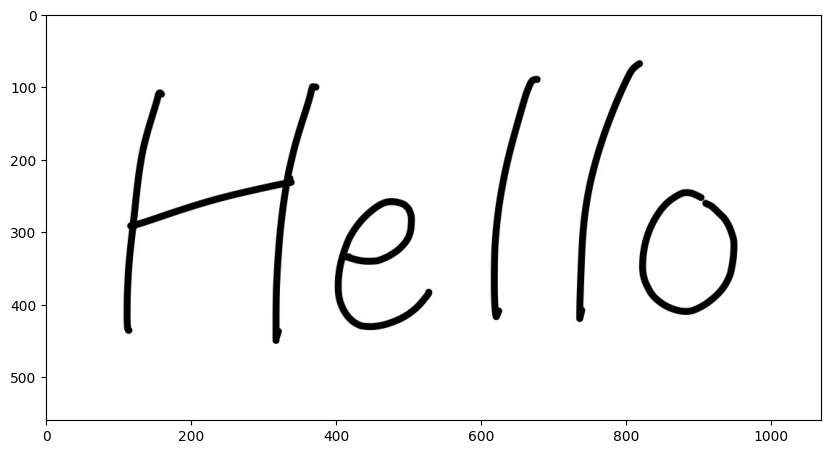

In [3]:
# Load image
image = Image.open("examples/Hello.png").convert("RGB")

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("on")
plt.show()

## 모델 로딩

huggingface의 transformers에 구현되어 있는 TrOCR 모델을 불러옵니다. transfomers 라이브러리에서 pre-train 된 TrOCR 모델을 제공합니다.

transfomers의 라이브러리에서 두 가지 class를 불러옵니다.
- TrOCRProcessor: 모델에 입력할 데이터의 전처리와 출력된 모델 결과물의 후처리를 수행합니다.
- VisionEncoderDecoderModel: 실제 모델이며 전처리된 입력을 받으면 결과물을 출력합니다.

In [4]:
print("[INFO] Load pretrained TrOCRProcessor")
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
print("[INFO] Load pretrained VisionEncoderDecoderModel")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

[INFO] Load pretrained TrOCRProcessor


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

[INFO] Load pretrained VisionEncoderDecoderModel


config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.47.1"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## 추론하기
TrOCRProcessor와 VisionEncoderDecoderModel의 내부 함수를 이용해 전처리, 추론, 후처리를 수행하여 원하는 결과물을 얻습니다.

In [5]:
# Preprocess
pixel_values = processor(images=image, return_tensors="pt").pixel_values
# Inference
token_ids = model.generate(pixel_values)
# Postprocess
text_from_image = processor.batch_decode(token_ids, skip_special_tokens=True)[0]

In [6]:
text_from_image

'Hello'